In [1]:
import os
import glob
import cv2
import numpy as np
import shutil
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_dir = '/work/data/dog_data/images/Images'
ann_dir = '/work/data/dog_data/annotations/Annotation'

train_dir = '/work/data/dog_photo'
test_dir = '/work/data/dog_photo_test'

In [5]:
 
def get_area_ratio(ann_path):
    tree = ET.parse(ann_path)

    xmin = int(tree.getroot().findall('object')[0].find('bndbox').find('xmin').text)
    xmax = int(tree.getroot().findall('object')[0].find('bndbox').find('xmax').text)
    ymin = int(tree.getroot().findall('object')[0].find('bndbox').find('ymin').text)
    ymax = int(tree.getroot().findall('object')[0].find('bndbox').find('ymax').text)
#     img = img[ymin:ymax, xmin:xmax, :]
    width = int(tree.getroot().findall('size')[0].find('width').text)
    height = int(tree.getroot().findall('size')[0].find('height').text)

    return height, width, (abs(ymin-ymax) * abs(xmin-xmax)) / (height*width)


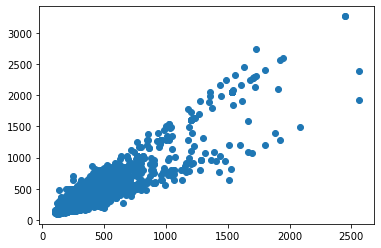

In [7]:
# check the distribution of the image dimensions

h = []
w = []

folders = os.listdir(ann_dir)
for folder in folders:
    for ann in os.listdir(os.path.join(ann_dir,folder)):
        ann_path = os.path.join(ann_dir, folder, ann)
        tree = ET.parse(ann_path)
        width = int(tree.getroot().findall('size')[0].find('width').text)
        height = int(tree.getroot().findall('size')[0].find('height').text)
    
        h.append(height)
        w.append(width)
        
plt.scatter(h, w)

### select images with object_size/img_size >0.8 and img_height> 256 and img_width > 256

In [ ]:
cnt =0 
dic = {}

folders = os.listdir(ann_dir)
for folder in folders:
    for ann in os.listdir(os.path.join(ann_dir,folder)):
        ann_path = os.path.join(folder, ann)
        height, width, ratio = get_area_ratio(os.path.join(ann_dir, ann_path))
        dic[ann_path]=[height, width, ratio]
        cnt +=1 
        

In [9]:
valid_path = []
for path, val in dic.items():
    height, width, ratio = val
#     if height> 512 and width > 512:
    if ratio>0.8 and height> 256 and width > 256:
        valid_path.append(path)

In [10]:
valid_dic = {}
for path in valid_path:
    valid_dic[path] = dic[path]

### copy images in valid_dic to a flat structure as training data 

In [25]:
 
for path, v in valid_dic.items():
    src = os.path.join(img_dir, path + '.jpg')
    dst = os.path.join(train_dir, '_'.join(path.split('/')) +'.jpg')
    shutil.copy(src, dst)

### create a test set using images that are not in the valid_dic

In [12]:
all_img_path = []
folders = os.listdir(img_dir)
for folder in folders:
    for img_name in os.listdir(os.path.join(img_dir, folder)):
        path = os.path.join(folder, img_name)
        all_img_path.append(path)
        
len(all_img_path)

20580

In [26]:
test_img_path = [i for i in all_img_path if i.split('.')[0] not in list(valid_dic.keys())]
print(test_img_path[0], len(valid_dic))

for path in test_img_path:
    src = os.path.join(os.path.join(img_dir, path))
    dst_name = '_'.join(path.split('/'))
    dst = os.path.join(os.path.join(test_dir, dst_name))
    shutil.copy(src, dst)